#Kaggle dataset download

In [1]:
from google.colab import files
files.upload() #uploading api

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"apoorvb","key":"ea102443c4fe13d54fd20e037c3e8b02"}'}

In [2]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c acea-water-prediction

  0% 0.00/100k [00:00<?, ?B/s]
100% 100k/100k [00:00<00:00, 37.2MB/s]
  0% 0.00/364k [00:00<?, ?B/s]
100% 364k/364k [00:00<00:00, 48.9MB/s]
  0% 0.00/431k [00:00<?, ?B/s]
100% 431k/431k [00:00<00:00, 59.5MB/s]
  0% 0.00/37.8k [00:00<?, ?B/s]
100% 37.8k/37.8k [00:00<00:00, 28.6MB/s]
  0% 0.00/258k [00:00<?, ?B/s]
100% 258k/258k [00:00<00:00, 57.5MB/s]
  0% 0.00/75.2k [00:00<?, ?B/s]
100% 75.2k/75.2k [00:00<00:00, 64.3MB/s]
  0% 0.00/256k [00:00<?, ?B/s]
100% 256k/256k [00:00<00:00, 84.4MB/s]
  0% 0.00/457k [00:00<?, ?B/s]
100% 457k/457k [00:00<00:00, 138MB/s]
  0% 0.00/475k [00:00<?, ?B/s]
100% 475k/475k [00:00<00:00, 64.8MB/s]
  0% 0.00/901k [00:00<?, ?B/s]
100% 901k/901k [00:00<00:00, 125MB/s]
  0% 0.00/8.76k [00:00<?, ?B/s]
100% 8.76k/8.76k [00:00<00:00, 8.17MB/s]


In [4]:
mv * /content/

mv: 'Aquifer_Auser.csv' and '/content/Aquifer_Auser.csv' are the same file
mv: 'Aquifer_Doganella.csv' and '/content/Aquifer_Doganella.csv' are the same file
mv: 'Aquifer_Luco.csv' and '/content/Aquifer_Luco.csv' are the same file
mv: 'Aquifer_Petrignano.csv' and '/content/Aquifer_Petrignano.csv' are the same file
mv: 'datasets_description.ods' and '/content/datasets_description.ods' are the same file
mv: 'datasets_description.xlsx' and '/content/datasets_description.xlsx' are the same file
mv: 'drive' and '/content/drive' are the same file
mv: 'kaggle.json' and '/content/kaggle.json' are the same file
mv: 'Lake_Bilancino.csv' and '/content/Lake_Bilancino.csv' are the same file
mv: 'River_Arno.csv' and '/content/River_Arno.csv' are the same file
mv: 'sample_data' and '/content/sample_data' are the same file
mv: 'Water_Spring_Amiata.csv' and '/content/Water_Spring_Amiata.csv' are the same file
mv: 'Water_Spring_Lupa.csv' and '/content/Water_Spring_Lupa.csv' are the same file
mv: 'Water_

#Acnea Water Prediction
Data exploration

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [6]:
import pandas as pd
import numpy as np
!pip install odfpy 

     |████████████████████████████████| 727kB 5.2MB/s 
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160691 sha256=875a9fc3d2b39bf57bb655cc5f0146575b2e34a2ac3b7ff2099c6e552643e8db
  Stored in directory: /root/.cache/pip/wheels/ce/6b/93/ec330f2991c5f1546abf640360e5a2022f76cb16e5d99ed2fd
Successfully built odfpy


In [7]:
ls

Aquifer_Auser.csv          kaggle.json
Aquifer_Doganella.csv      Lake_Bilancino.csv
Aquifer_Luco.csv           River_Arno.csv
Aquifer_Petrignano.csv     sample_data/
datasets_description.ods   Water_Spring_Amiata.csv
datasets_description.xlsx  Water_Spring_Lupa.csv
drive/                     Water_Spring_Madonna_di_Canneto.csv


In [21]:
info = pd.read_excel('datasets_description.xlsx', sheet_name=None)
print(info['Datasets_Description'].iloc[5])
info.keys()
info['Datasets_Feature_Description'][47:52]

Database                                              River_Arno
Description    Information about Arno river. The Arno is the ...
Output                                 Hydrometry_Nave_di_Rosano
Name: 5, dtype: object


,AUSER,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
47,ARNO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Field,Format,Description,NaN,NaN,NaN,NaN,NaN
49,Date,Daily Date,Uniquely identifies a day (Primary Key),NaN,NaN,NaN,Code,Values
50,Rainfall_X,Real Number,"It indicates the quantity of rain falling, exp...",NaN,NaN,NaN,X,"Le_Croci, Cavallina, S_Agata, Mangona, S_Piero..."
51,Temperature_Y,Real Number,"It indicates the temperature, expressed in °C,...",NaN,NaN,NaN,Y,Firenze


In [22]:
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][48])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][49])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][50])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][51])
print(info['Datasets_Feature_Description'].iloc[47:55]['Unnamed: 2'][52])

Description
Uniquely identifies a day (Primary Key)
It indicates the quantity of rain falling, expressed in millimeters (mm), in the area X
It indicates the temperature, expressed in °C, detected by the thermometric station Y
It indicates the river level, expressed in meters (m), detected by the hydrometric station Z


In [23]:
river = pd.read_csv('River_Arno.csv')
river.head()

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


In [24]:
df = river
df.fillna(0,inplace=True)
df.columns

Index(['Date', 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze',
       'Hydrometry_Nave_di_Rosano'],
      dtype='object')

In [25]:
print(df.shape)
df.head()

(8217, 17)


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.82
1,02/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.94
2,03/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.11
3,04/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.84
4,05/01/1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.88


In [26]:
#getting number of rows and date of first datapoint with non-0 data for every column
for i in iter(df.columns):
  if i.split('_')[0] == 'Rainfall':
    query = df.query(i+'!= 0')
    print(i, query.shape[0], query.iloc[0].loc['Date'])

Rainfall_Le_Croci 2247 09/01/2004
Rainfall_Cavallina 1902 09/01/2004
Rainfall_S_Agata 2271 01/01/2004
Rainfall_Mangona 2204 08/01/2004
Rainfall_S_Piero 2347 05/01/2004
Rainfall_Vernio 1617 08/01/2004
Rainfall_Stia 478 03/01/2004
Rainfall_Consuma 549 07/01/2004
Rainfall_Incisa 1699 07/01/2004
Rainfall_Montevarchi 565 01/01/2004
Rainfall_S_Savino 520 02/01/2004
Rainfall_Laterina 441 08/01/2004
Rainfall_Bibbiena 876 03/01/2004
Rainfall_Camaldoli 540 09/01/2004


In [27]:
#using subset of df from date : 01/01/2004 
data = df.iloc[df.loc[df['Date']=='01/01/2004'].index[0]:]
print(data.shape)
data.head()

(6026, 17)


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84
2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93
2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61
2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35
2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44


In [28]:
data['total_rain'] = data.iloc[:,1:15].sum(axis=1)
data.rename(columns = {'Temperature_Firenze':'temperature'}, inplace=True)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84,0.6
2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93,0.2
2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61,0.4
2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35,0.0
2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44,0.2


In [49]:
combined = data.iloc[:,[0,-3,-2,-1]].copy()
combined.head()

,Date,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,01/01/2004,8.65,1.84,0.6
2192,02/01/2004,7.10,1.93,0.2
2193,03/01/2004,5.50,1.61,0.4
2194,04/01/2004,3.55,1.35,0.0
2195,05/01/2004,2.70,1.44,0.2


observing feature variation wrt to each other

In [30]:
for i in iter(df.columns):
  if i.split('_')[0] == 'Rainfall':
    print('{} corrrelation with Hydrometry = {}'.format(i, data[i].corr(data['Hydrometry_Nave_di_Rosano'])))

Rainfall_Le_Croci corrrelation with Hydrometry = 0.23966280087212544
Rainfall_Cavallina corrrelation with Hydrometry = 0.2163401744591761
Rainfall_S_Agata corrrelation with Hydrometry = 0.21853142275185197
Rainfall_Mangona corrrelation with Hydrometry = 0.22565950069402
Rainfall_S_Piero corrrelation with Hydrometry = 0.2150349165426303
Rainfall_Vernio corrrelation with Hydrometry = 0.19813255142780523
Rainfall_Stia corrrelation with Hydrometry = 0.18069393331780031
Rainfall_Consuma corrrelation with Hydrometry = 0.18398213090325108
Rainfall_Incisa corrrelation with Hydrometry = 0.3089795868775006
Rainfall_Montevarchi corrrelation with Hydrometry = 0.16051391349526598
Rainfall_S_Savino corrrelation with Hydrometry = 0.18972897685057796
Rainfall_Laterina corrrelation with Hydrometry = 0.17062437154321144
Rainfall_Bibbiena corrrelation with Hydrometry = 0.22027431362329353
Rainfall_Camaldoli corrrelation with Hydrometry = 0.17728871235567017


Text(0.5, 1.0, 'Correlation among the variables')

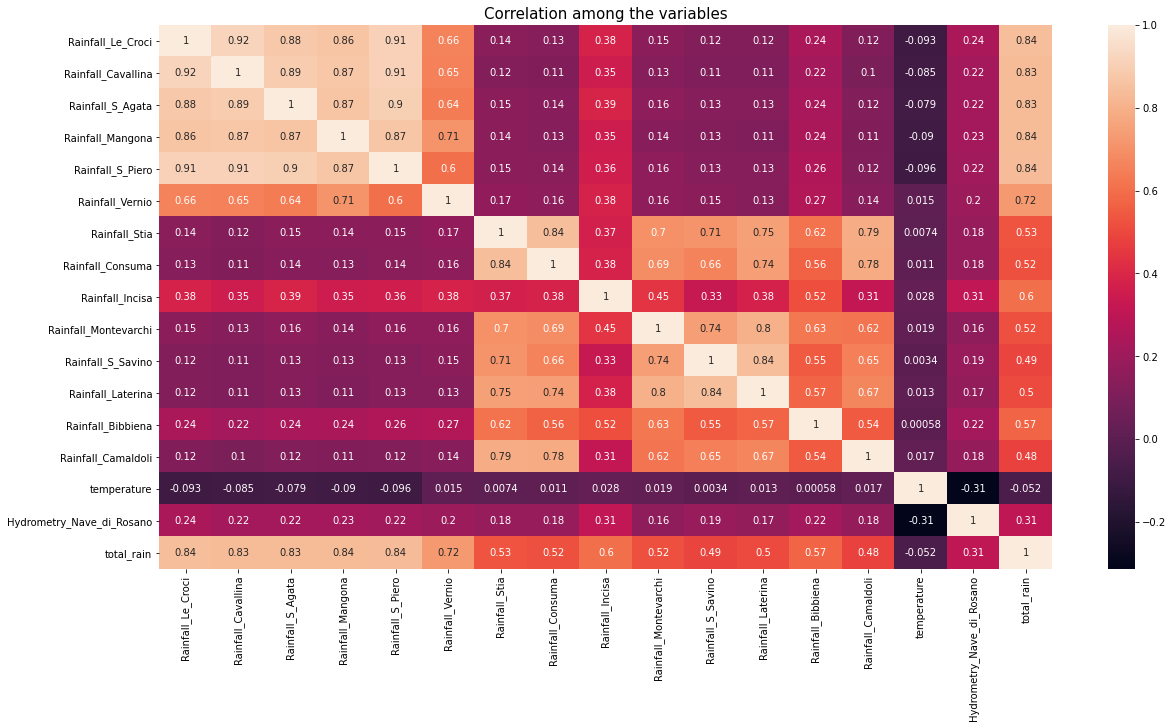

In [31]:
correlation = data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among the variables", size=15)

Text(0.5, 1.0, 'Correlation among all the variables of river data')

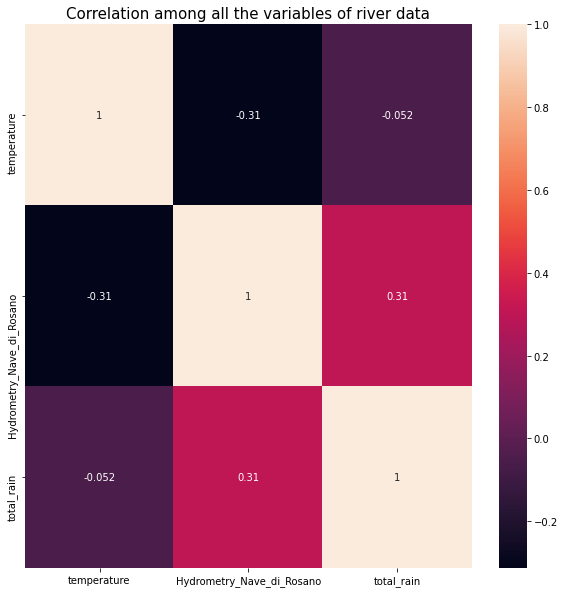

In [32]:
correlation = combined.corr()
plt.figure(figsize=(10,10), facecolor='w')
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
plt.title("Correlation among all the variables of river data", size=15)

In [44]:
com = combined.iloc[:,1:]
com.head()

,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,0.247851,0.272593,0.000933
2192,0.203438,0.285926,0.000311
2193,0.157593,0.238519,0.000622
2194,0.101719,0.200000,0.000000
2195,0.077364,0.213333,0.000311


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

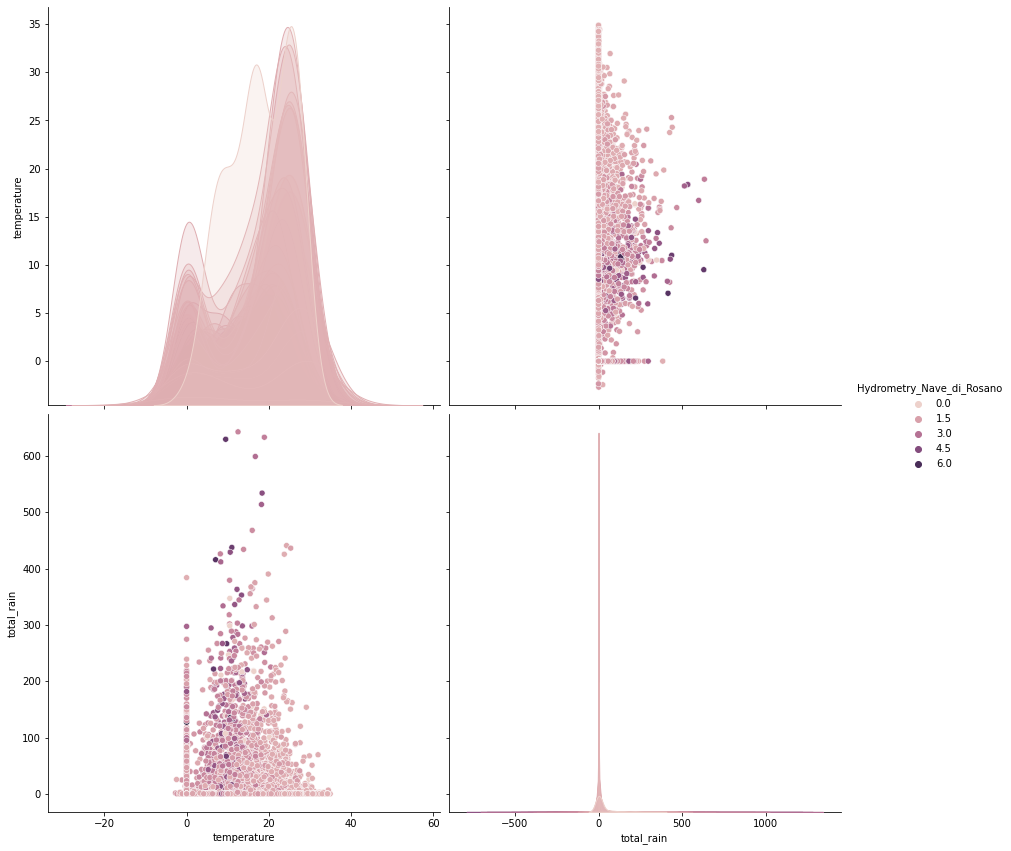

In [34]:
sns.pairplot(combined.iloc[:, 1:], hue='Hydrometry_Nave_di_Rosano', height=6)

In [35]:
combined.describe()
#print('total rain {}'.format(combined['total_rain'].describe()))

,temperature,Hydrometry_Nave_di_Rosano,total_rain
count,6026.000000,6026.000000,6026.000000
mean,13.556248,1.452147,23.136143
std,9.290447,0.649966,55.258946
min,-2.700000,0.000000,0.000000
25%,6.150000,1.080000,0.000000
50%,13.750000,1.280000,0.400000
75%,21.100000,1.670000,17.000000
max,34.900000,6.750000,643.000000


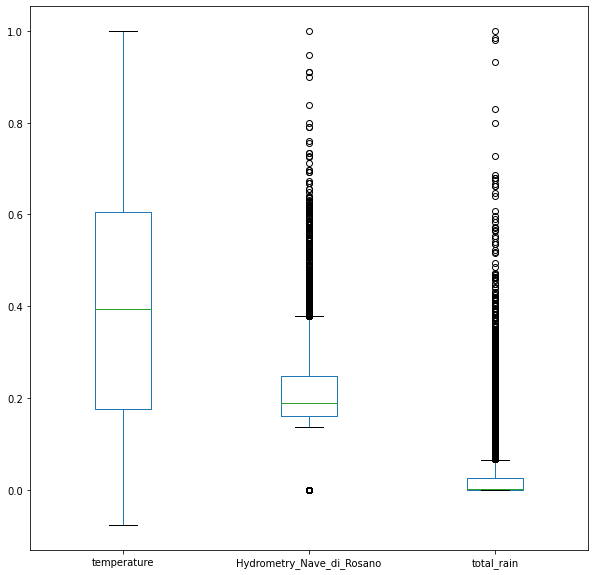

In [36]:
combined['temperature'] = combined['temperature']/combined['temperature'].max()
combined['total_rain'] = combined['total_rain']/combined['total_rain'].max()
combined['Hydrometry_Nave_di_Rosano'] = combined['Hydrometry_Nave_di_Rosano']/combined['Hydrometry_Nave_di_Rosano'].max()
combined.plot(x='Date', kind='box', figsize=(10,10))

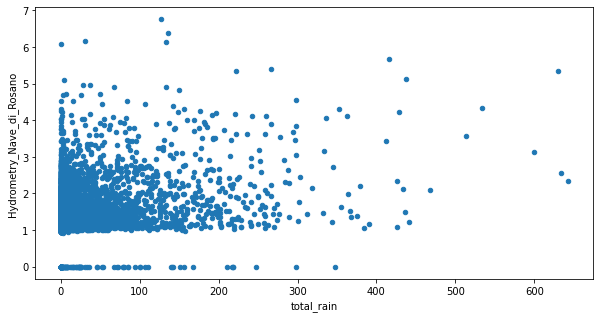

In [63]:
combined.plot(x='total_rain', y='Hydrometry_Nave_di_Rosano', kind='scatter', figsize=(10,5))

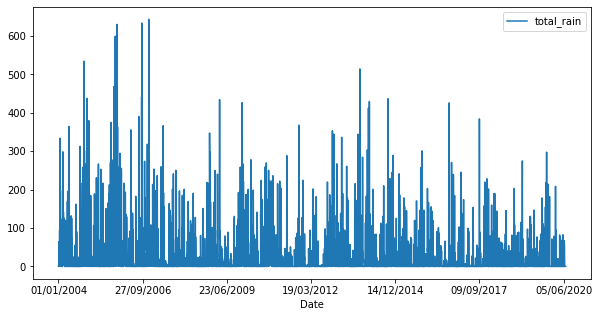

In [62]:
combined.plot(x='Date', y='total_rain', kind='line', figsize=(10,5))

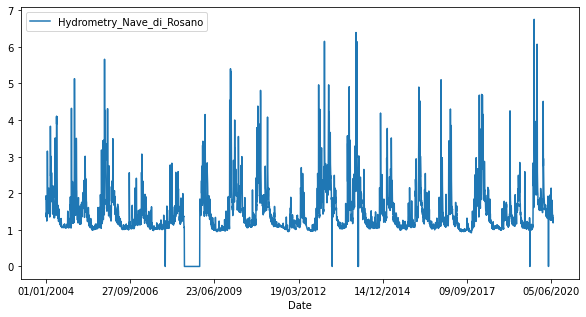

In [61]:
combined.plot(x='Date', y='Hydrometry_Nave_di_Rosano', kind='line', figsize=(10,5))

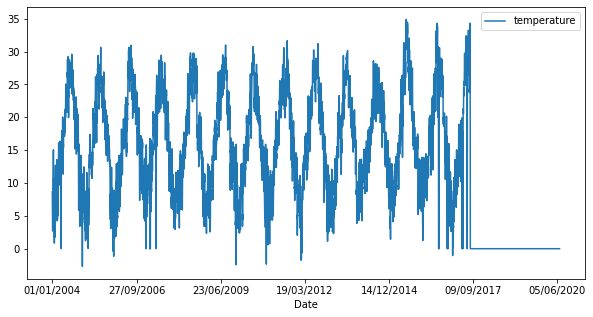

In [66]:
combined.plot(x='Date', y='temperature', kind='line', figsize=(10,5))

In [56]:
combined.tail(100)
#as evidenced from graph and the snippet of dataframe below, post 2017 there are no recordings for temperature

,Date,temperature,Hydrometry_Nave_di_Rosano,total_rain
8117,23/03/2020,0.0,1.55,0.6
8118,24/03/2020,0.0,1.55,18.4
8119,25/03/2020,0.0,1.58,2.6
8120,26/03/2020,0.0,1.56,2.8
8121,27/03/2020,0.0,1.58,0.0
...,...,...,...,...
8212,26/06/2020,0.0,1.34,0.0
8213,27/06/2020,0.0,1.21,0.0
8214,28/06/2020,0.0,1.30,0.0
8215,29/06/2020,0.0,1.19,0.0


In [53]:
import statsmodels.api as sm
import pylab

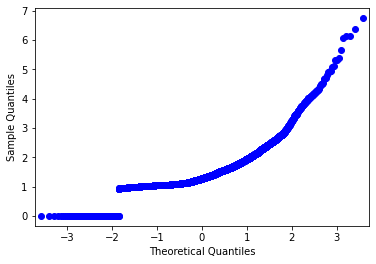

In [41]:
sm.qqplot(data['Hydrometry_Nave_di_Rosano'])
pylab.show()

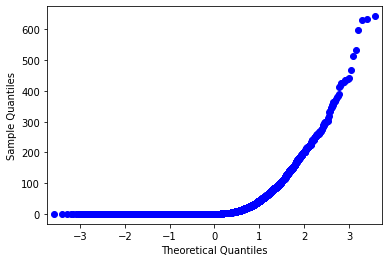

In [42]:
sm.qqplot(data['total_rain'])
pylab.show()

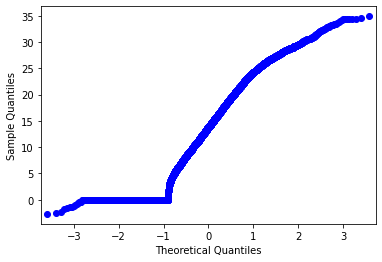

In [43]:
sm.qqplot(data['temperature'])
pylab.show()

modelling
1. normalised data in range [0,1]. Inclusive.
2. log transformed data
3. original range

In [57]:
combined['avg_hydro'] = combined['Hydrometry_Nave_di_Rosano'].apply
#combined.plot(x='Date', y='Hydrometry_Nave_di_Rosano', kind='line', figsize=(10,10))

,Date,temperature,Hydrometry_Nave_di_Rosano,total_rain
2191,01/01/2004,8.65,1.84,0.6
2192,02/01/2004,7.10,1.93,0.2
2193,03/01/2004,5.50,1.61,0.4
2194,04/01/2004,3.55,1.35,0.0
2195,05/01/2004,2.70,1.44,0.2
